2025-03-05 20:05:03.287 Python[71652:2032729] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


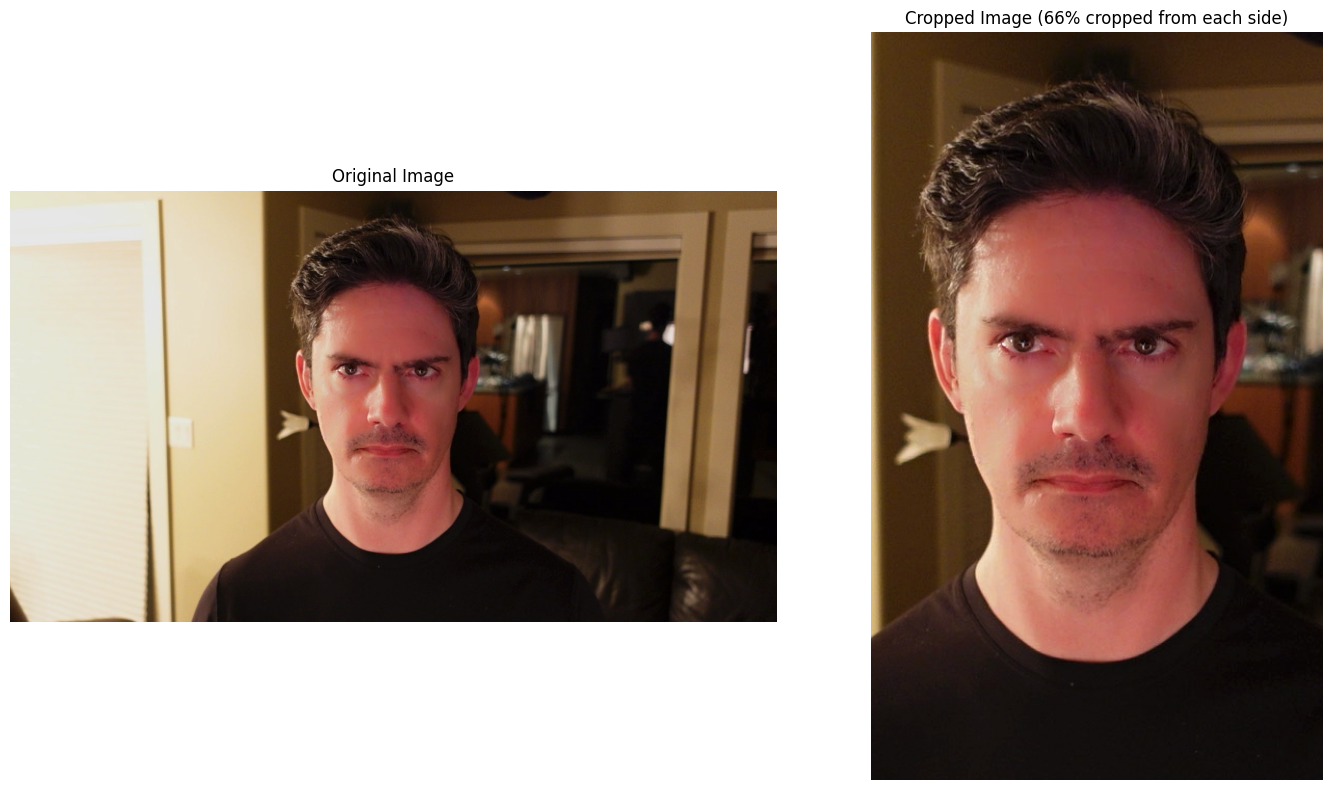

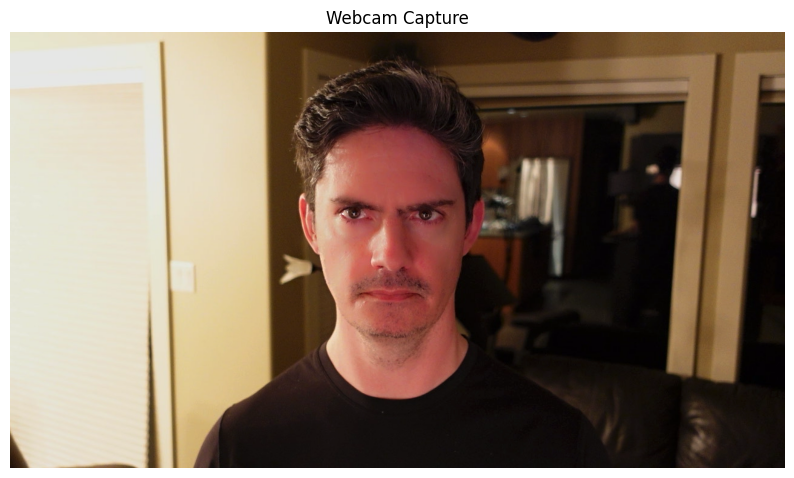

In [1]:
import cv2
import matplotlib.pyplot as plt
import time


def capture_image():
    # Initialize webcam (0 is usually the built-in webcam)
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Could not access the webcam")
        return None

    # Give the camera a moment to adjust to lighting
    time.sleep(1)

    # Capture a single frame
    ret, frame = cap.read()

    # Release the webcam
    cap.release()

    if not ret:
        print("Failed to capture an image")
        return None

    # Convert BGR (OpenCV format) to RGB (for matplotlib)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    return rgb_frame


def crop_center(img, crop_percent=66):
    # Calculate how much to keep (100% - crop_percent)
    keep_percent = 100 - crop_percent

    # Get dimensions
    h, w = img.shape[:2]

    # Calculate new dimensions (34% of original)
    new_width = int(w * keep_percent / 100)
    new_height = int(h * keep_percent / 100)

    # Calculate starting points to ensure we crop from center
    start_x = (w - new_width) // 2
    start_y = (h - new_height) // 2

    # Perform the crop
    cropped_img = img[start_y : start_y + new_height, start_x : start_x + new_width]

    return cropped_img


def crop_width_only(img, crop_percent=66):
    """Crop only from the sides, keeping the full height."""
    # Calculate how much to keep (100% - crop_percent)
    keep_percent = 100 - crop_percent

    # Get dimensions
    h, w = img.shape[:2]

    # Calculate new width (34% of original)
    new_width = int(w * keep_percent / 100)

    # Calculate starting point to ensure we crop from center
    start_x = (w - new_width) // 2

    # Perform the crop - keep full height, crop only width
    cropped_img = img[:, start_x : start_x + new_width]

    return cropped_img


def crop_without_zoom(img, crop_percent=66):
    # Get original dimensions
    original_h, original_w = img.shape[:2]

    # Get the cropped image
    cropped_img = crop_center(img, crop_percent)

    # Resize back to original dimensions
    resized_img = cv2.resize(cropped_img, (original_w, original_h))

    return resized_img


# Capture an image
image = capture_image()

if image is not None:
    # Display the image in the notebook

    cropped_image = crop_width_only(image, 66)

    # Display both original and cropped images
    plt.figure(figsize=(15, 8))

    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cropped_image)
    plt.title('Cropped Image (66% cropped from each side)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis("off")  # Hide axis
    plt.title("Webcam Capture")
    plt.show()

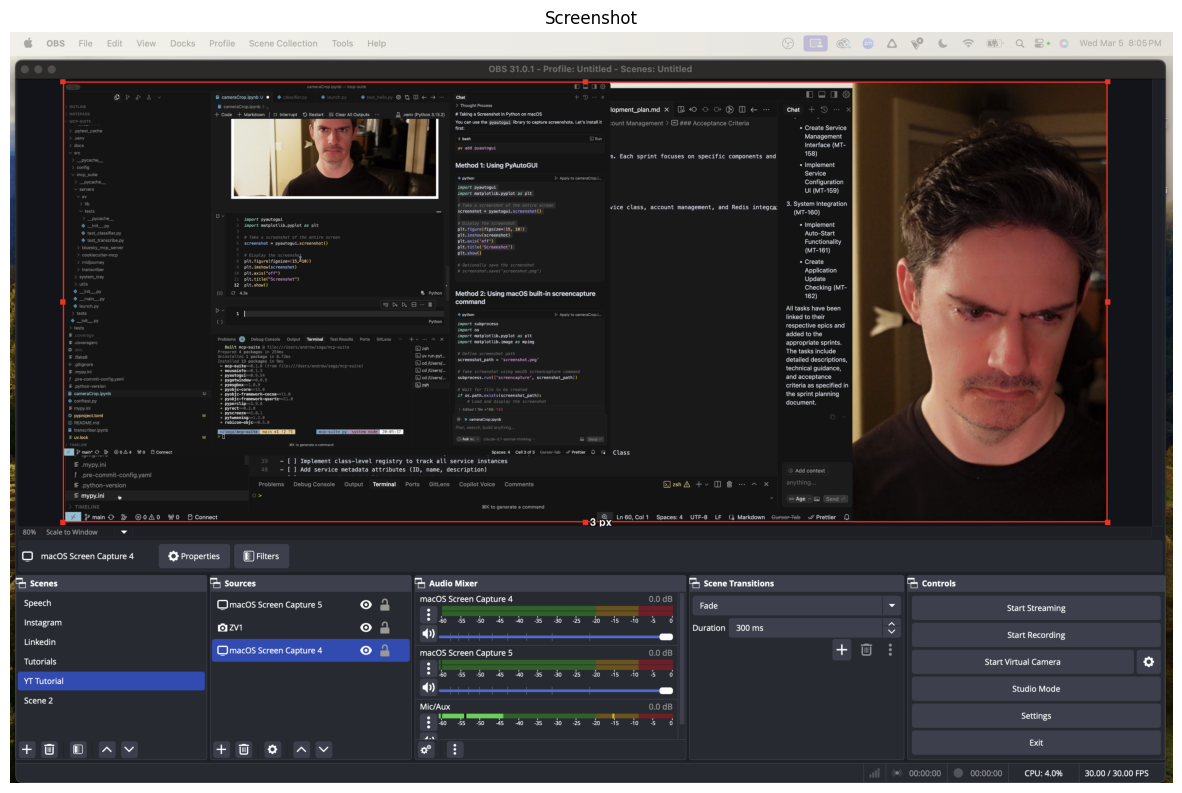

In [2]:
import pyautogui
import matplotlib.pyplot as plt

# Take a screenshot of the entire screen
screenshot = pyautogui.screenshot()

# Display the screenshot
plt.figure(figsize=(15, 10))
plt.imshow(screenshot)
plt.axis("off")
plt.title("Screenshot")
plt.show()

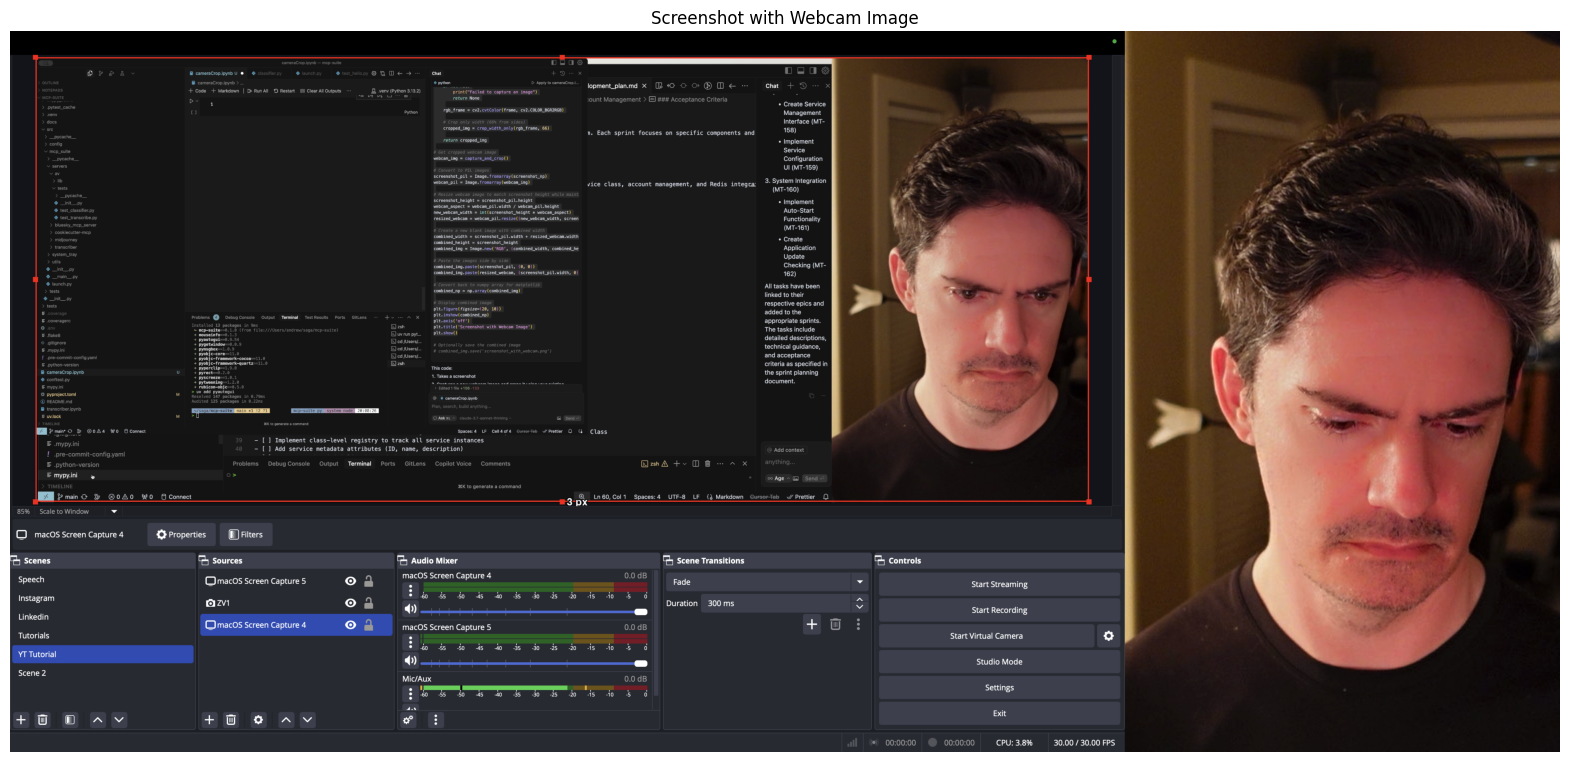

In [4]:
import pyautogui
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2

# Take a screenshot of the entire screen
screenshot = pyautogui.screenshot()
screenshot_np = np.array(screenshot)


# Assuming you already have your cropped webcam image from previous code
# If not, capture it again using your crop_width_only function
def capture_and_crop():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Could not access the webcam")
        return None

    import time

    time.sleep(1)

    ret, frame = cap.read()
    cap.release()

    if not ret:
        print("Failed to capture an image")
        return None

    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Crop only width (66% from sides)
    cropped_img = crop_width_only(rgb_frame, 66)

    return cropped_img


# Get cropped webcam image
webcam_img = capture_and_crop()

# Convert to PIL images
screenshot_pil = Image.fromarray(screenshot_np)
webcam_pil = Image.fromarray(webcam_img)

# Resize webcam image to match screenshot height while maintaining aspect ratio
screenshot_height = screenshot_pil.height
webcam_aspect = webcam_pil.width / webcam_pil.height
new_webcam_width = int(screenshot_height * webcam_aspect)
resized_webcam = webcam_pil.resize((new_webcam_width, screenshot_height))

# Create a new blank image with combined width
combined_width = screenshot_pil.width + resized_webcam.width
combined_height = screenshot_height
combined_img = Image.new("RGB", (combined_width, combined_height))

# Paste the images side by side
combined_img.paste(screenshot_pil, (0, 0))
combined_img.paste(resized_webcam, (screenshot_pil.width, 0))

# Convert back to numpy array for matplotlib
combined_np = np.array(combined_img)

# Display combined image
plt.figure(figsize=(20, 10))
plt.imshow(combined_np)
plt.axis("off")
plt.title("Screenshot with Webcam Image")
plt.show()